<a href="https://colab.research.google.com/github/johhan27/got_analysis/blob/main/GoT_Deaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
#Dataset from Kaggle
#https://www.kaggle.com/mylesoneill/game-of-thrones?select=character-deaths.csv

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


In [77]:
got_deaths = pd.read_csv('character-deaths.csv')

In [78]:
got_deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


Let's explore the data!

In [79]:
got_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


What can we notice in the columns with null values?

In [80]:
got_deaths.describe()

,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
count,305.000000,307.000000,299.000000,905.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,299.157377,2.928339,40.070234,28.861878,0.828790,0.468920,0.272628,0.353326,0.424209,0.272628,0.284624
std,0.703483,1.326482,20.470270,20.165788,0.376898,0.499305,0.445554,0.478264,0.494492,0.445554,0.451481
min,297.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,299.000000,2.000000,25.500000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,299.000000,3.000000,39.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,300.000000,4.000000,57.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,300.000000,5.000000,80.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


:( We only have data until book 5

In [81]:
got_deaths.describe(exclude='number')

,Name,Allegiances
count,917,917
unique,916,21
top,Myles,None
freq,2,253


21 Allegiances? Do you actually remember that many? We'll check this out in a second! 

Let's take a look at the NaN values, who are these people?

In [82]:
got_deaths.loc[np.isnan(got_deaths['Death Year'])]

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
5,Aemon Estermont,Baratheon,NaN,NaN,NaN,NaN,1,1,0,1,1,0,0
8,Aeron Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,Yohn Farwynd,Greyjoy,NaN,NaN,NaN,19.0,1,1,0,0,0,1,0
907,Yohn Royce,Arryn,NaN,NaN,NaN,29.0,1,1,1,0,0,1,0
910,Ysilla,House Targaryen,NaN,NaN,NaN,8.0,1,0,0,0,0,0,1
911,Zei,Stark,NaN,NaN,NaN,64.0,0,0,0,0,1,0,0


Ok... I don't remember these people so let's go with Arya and try to find a pattern 

In [83]:
got_deaths.loc[got_deaths['Name'] == 'Arya Stark']

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
55,Arya Stark,Stark,NaN,NaN,NaN,2.0,0,1,1,1,1,1,1


Cool! our NaN are actually useful but we could remove those characters that we never introduced to us.

In [84]:
got_deaths = got_deaths[got_deaths['Book Intro Chapter'].notna()]

Here we go again! Let's take a look!

In [85]:
got_deaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                905 non-null    object 
 1   Allegiances         905 non-null    object 
 2   Death Year          300 non-null    float64
 3   Book of Death       302 non-null    float64
 4   Death Chapter       296 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              905 non-null    int64  
 7   Nobility            905 non-null    int64  
 8   GoT                 905 non-null    int64  
 9   CoK                 905 non-null    int64  
 10  SoS                 905 non-null    int64  
 11  FfC                 905 non-null    int64  
 12  DwD                 905 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 99.0+ KB


Among the columns with null values, "Book of Death" has more datapoints; therefore, we'll use it as a cornerstone to create a new column "Died" 
.
.
.
Because that's what we love about GoT

In [86]:
got_deaths['Died'] = np.where(got_deaths['Book of Death'].notna(), 1, 0)

In [87]:
got_deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Died
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0,1
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1,0
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1,1
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,1,1,1,0,1,1,0,1


In [88]:
crosstab_nobility = pd.crosstab(got_deaths['Nobility'], got_deaths['Died'], margins=True)
print(crosstab_nobility)

Died        0    1  All
Nobility               
0         295  186  481
1         308  116  424
All       603  302  905


Quick break! the probability of dying overall is...

In [89]:
302/905

#lots of blood

0.33370165745856356

In [90]:
crosstab_nobility_norm = pd.crosstab(got_deaths['Nobility'], got_deaths['Died'], normalize='index')
print(crosstab_nobility_norm)

Died             0         1
Nobility                    
0         0.613306  0.386694
1         0.726415  0.273585


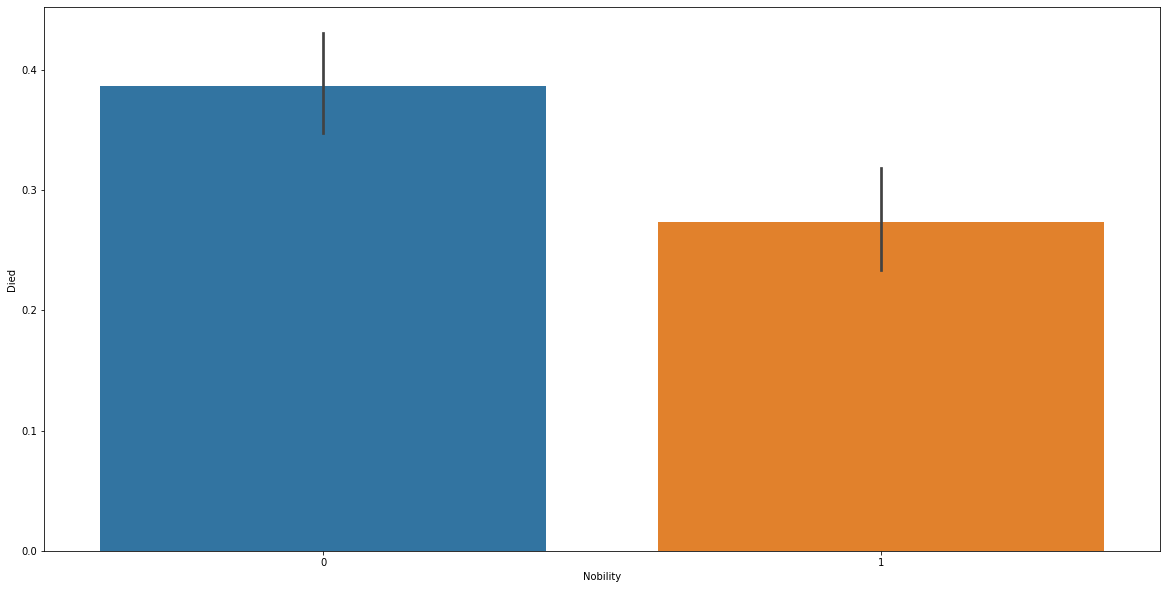

In [91]:
fig, ax =plt.subplots(1, figsize=[20,10])
sns.barplot(x='Nobility', y='Died', data=got_deaths)

In [92]:
crosstab_gender = pd.crosstab(got_deaths['Gender'], got_deaths['Died'], margins=True)
print(crosstab_gender)

Died      0    1  All
Gender               
0       121   36  157
1       482  266  748
All     603  302  905


In [93]:
crosstab_gender_norm = pd.crosstab(got_deaths['Gender'], got_deaths['Died'], normalize='index')
print(crosstab_gender_norm)

Died           0         1
Gender                    
0       0.770701  0.229299
1       0.644385  0.355615


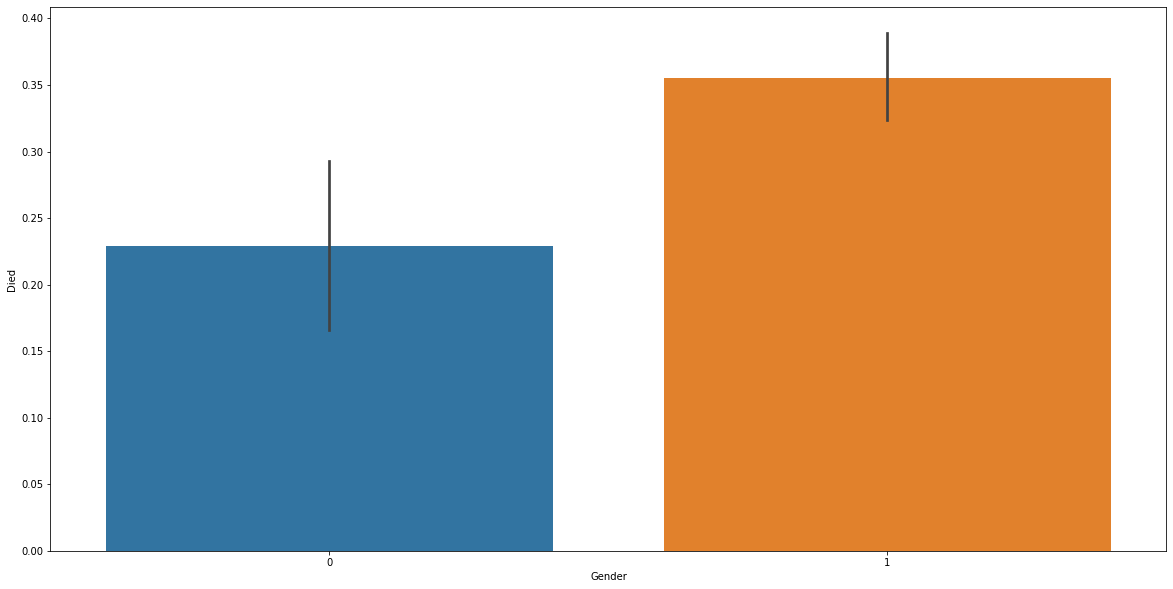

In [94]:
fig, ax =plt.subplots(1, figsize=[20,10])
sns.barplot(x='Gender', y='Died', data=got_deaths)

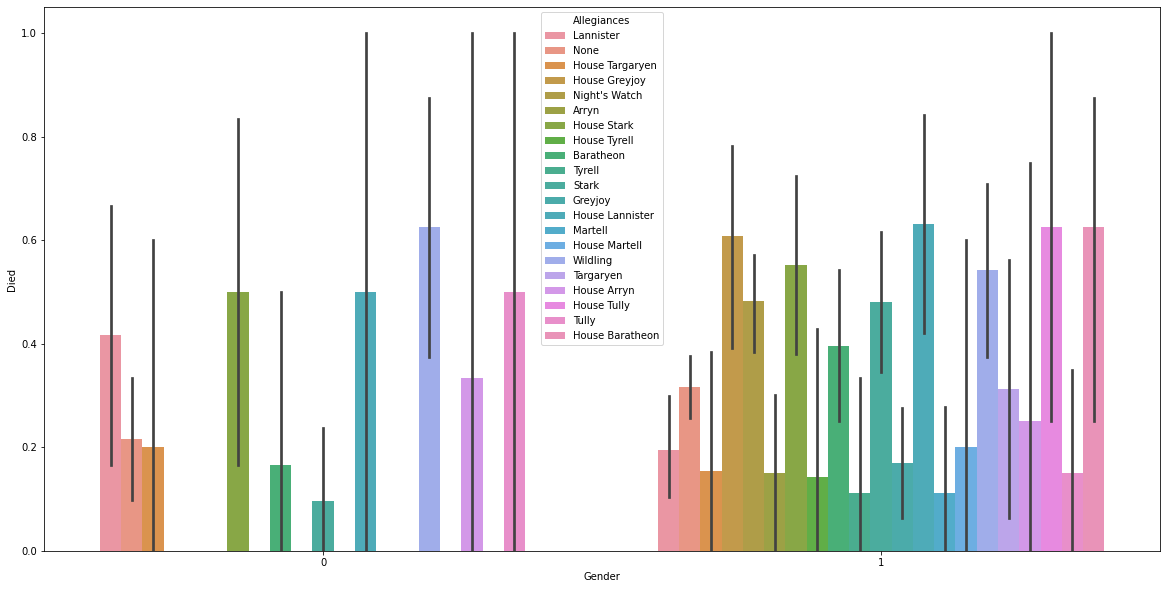

In [95]:
fig, ax =plt.subplots(1, figsize=[20,10])
sns.barplot(x='Gender', y='Died', hue='Allegiances', data=got_deaths)

HUH! I didn't know that there was a "House Stark" AND also a "Stark" Allegiance. Let's combine them and get rid of formality.

In [96]:
for i in got_deaths['Allegiances'][:25]:
  print (i)

Lannister
None
House Targaryen
House Greyjoy
Night's Watch
None
House Greyjoy
Night's Watch
House Greyjoy
House Targaryen
Night's Watch
None
Arryn
Night's Watch
House Stark
House Tyrell
Baratheon
Baratheon
None
House Tyrell
Baratheon
Night's Watch
House Stark
Tyrell
Lannister


In [97]:
got_deaths['Allegiances'] = [allegiance[6:] if allegiance[:5] == 'House' else allegiance for allegiance in got_deaths['Allegiances']]


In [98]:
for i in got_deaths['Allegiances'][:25]:
  print (i)

Lannister
None
Targaryen
Greyjoy
Night's Watch
None
Greyjoy
Night's Watch
Greyjoy
Targaryen
Night's Watch
None
Arryn
Night's Watch
Stark
Tyrell
Baratheon
Baratheon
None
Tyrell
Baratheon
Night's Watch
Stark
Tyrell
Lannister


But let's be honest, we just care about the important people (money, blood, superpowers, braveness, DRAGONS!)

In [99]:
top_allegiances = ['Lannister', 'Targaryen', "Night's Watch", 'Stark', 'Baratheon', 'Greyjoy']

In [100]:
got_death_top = got_deaths.loc[got_deaths['Allegiances'].isin(top_allegiances)]

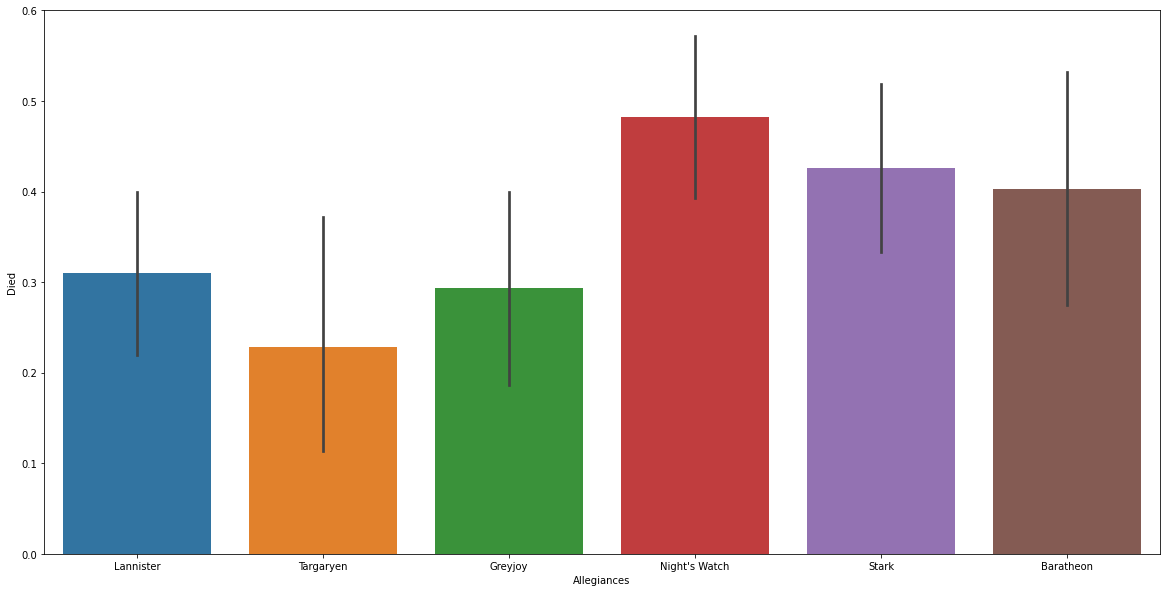

In [102]:
fig, ax =plt.subplots(1, figsize=[20,10])
sns.barplot(x='Allegiances', y='Died', data=got_death_top)

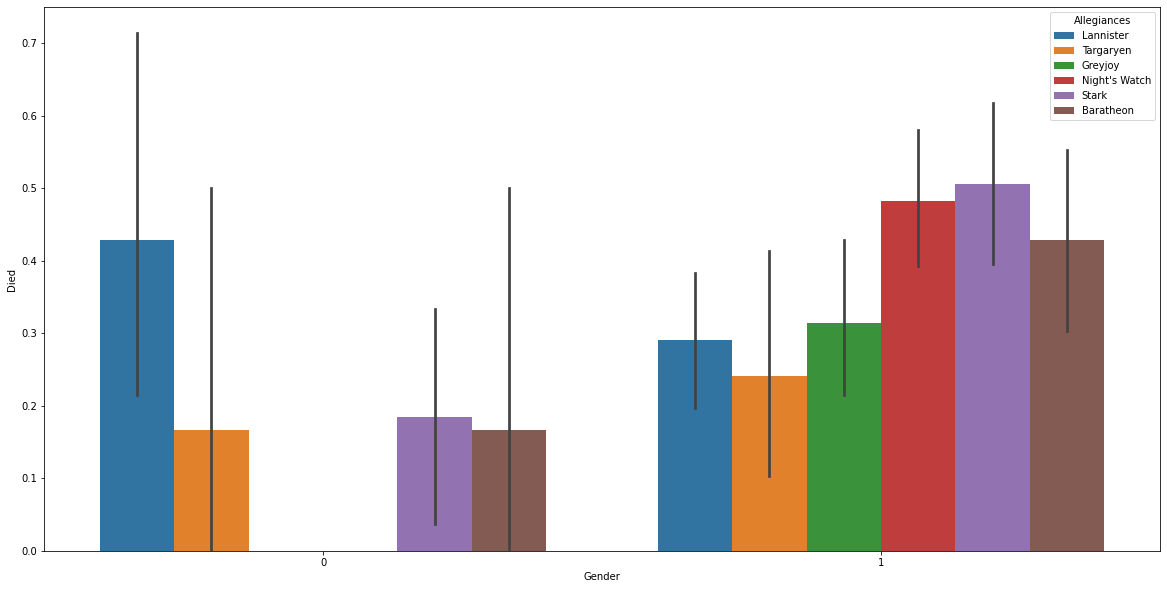

In [101]:
fig, ax =plt.subplots(1, figsize=[20,10])
sns.barplot(x='Gender', y='Died', hue='Allegiances', data=got_death_top)

What do The Greyjoys and the Night's Watch have in common? What's going on with Lannister Women?